In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# To import the dataset from the UCI repository.

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
# metadata 
print(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 


d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [3]:
df = pd.concat([X, y], axis=1)

In [4]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Handling Null Values

In [7]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
Float_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in Float_columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('--------------------------------------')

Global_active_power
6534
['4.216' '5.360' '5.374' ... 4.068 3.94 3.74]
--------------------------------------
Global_reactive_power
896
['0.418' '0.436' '0.498' '0.502' '0.528' '0.522' '0.520' '0.510' '0.470'
 '0.478' '0.398' '0.422' '0.282' '0.152' '0.156' '0.000' '0.076' '0.090'
 '0.200' '0.058' '0.180' '0.144' '0.118' '0.108' '0.202' '0.192' '0.186'
 '0.116' '0.136' '0.148' '0.160' '0.158' '0.100' '0.082' '0.050' '0.052'
 '0.162' '0.086' '0.048' '0.054' '0.068' '0.166' '0.174' '0.178' '0.188'
 '0.088' '0.080' '0.070' '0.084' '0.074' '0.106' '0.092' '0.064' '0.046'
 '0.138' '0.134' '0.132' '0.120' '0.130' '0.154' '0.078' '0.142' '0.140'
 '0.146' '0.150' '0.170' '0.102' '0.072' '0.060' '0.056' '0.062' '0.112'
 '0.066' '0.172' '0.168' '0.194' '0.184' '0.096' '0.164' '0.182' '0.094'
 '0.098' '0.176' '0.190' '0.204' '0.220' '0.198' '0.208' '0.244' '0.334'
 '0.298' '0.296' '0.286' '0.278' '0.104' '0.258' '0.238' '0.256' '0.214'
 '0.230' '0.210' '0.240' '0.124' '0.122' '0.270' '0.302' '0.2

In [9]:
for col in Float_columns:
    try: 
        df[col] = df[col].str.replace('?','' )
    except:
        pass

In [10]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      43643
Global_reactive_power    43643
Voltage                  43643
Global_intensity         43643
Sub_metering_1           43643
Sub_metering_2           43643
Sub_metering_3           25979
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.reset_index(drop = True ,inplace = True)

In [13]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## Duplicates Row Check

In [14]:
df.duplicated().sum()

np.int64(0)

## Columns DataType Convertion

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\gkama\AppData\Local\Temp\ipykernel_7844\2263964175.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [16]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

C:\Users\gkama\AppData\Local\Temp\ipykernel_7844\479537049.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


In [17]:
Float_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for i in Float_columns:
    try:
        df[i] = df[i].str.replace('?', '0')
        df[i] = df[i].astype(float)
    except:
        print(i)

Sub_metering_3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005637 entries, 0 to 2005636
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 137.7 MB


## Detecting Outliers by various method

1) Boxplot Method

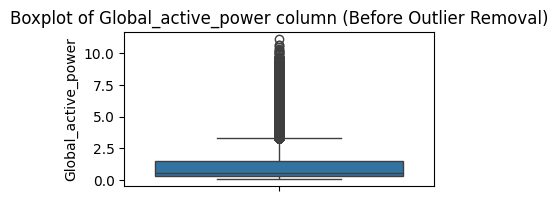

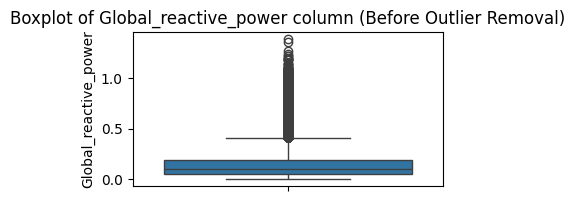

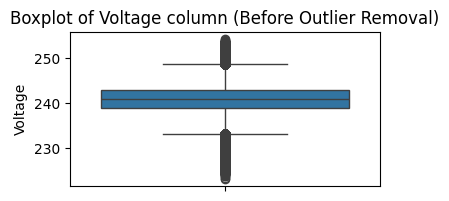

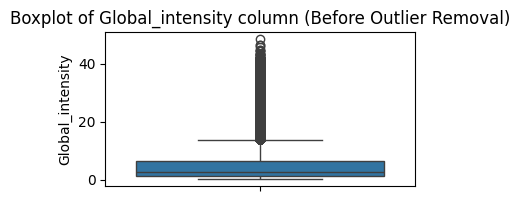

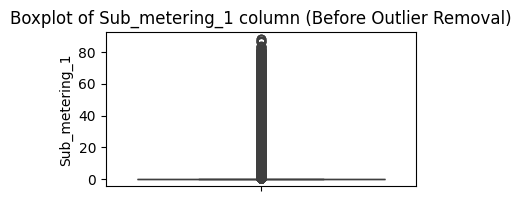

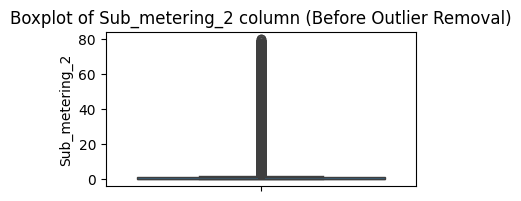

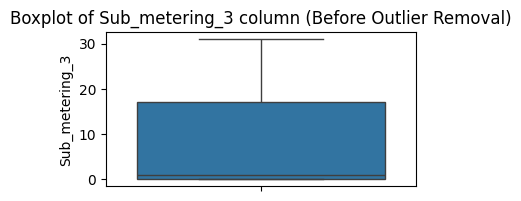

In [19]:
# ✅ Visualizing Outliers using Boxplot
for i in Float_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data=df[i])
    plt.title(f"Boxplot of {i} column (Before Outlier Removal)")
    plt.show()

2) Z-Score Method

## Feature Engineering